In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import joblib


Data collection and procesing

In [2]:
dataset = pd.read_csv('concrete_data.csv')

In [19]:
dataset.shape

(1030, 9)

In [4]:
dataset.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
dataset.shape

(1030, 9)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [3]:
dataset.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [4]:
X = dataset.drop(['concrete_compressive_strength'],axis=1)
y = dataset['concrete_compressive_strength']

In [10]:
print(y)

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1030, dtype: float64


In [5]:
# splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.1,random_state=2)

Model Training

In [6]:
# linear rergression
lin_reg_model = LinearRegression()

In [7]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [8]:
# prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [9]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error",error_score)

R squared error 0.619117934065253


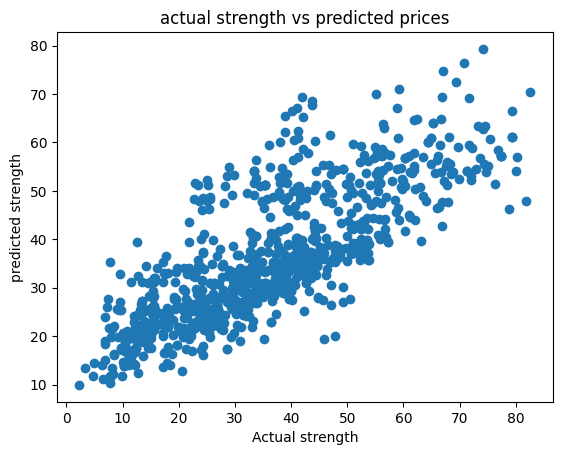

In [10]:
# visualise actual and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual strength")
plt.ylabel("predicted strength")
plt.title("actual strength vs predicted prices")
plt.show()

In [11]:
# prediction on training data
test_data_prediction = lin_reg_model.predict(X_test)

In [12]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error",error_score)

R squared error 0.5617124361105921


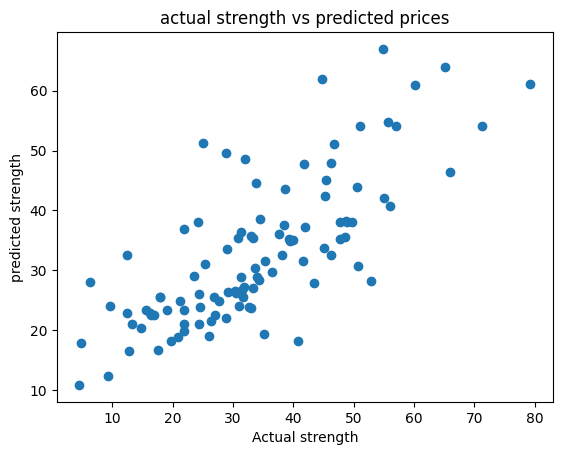

In [13]:
# visualise actual and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual strength")
plt.ylabel("predicted strength")
plt.title("actual strength vs predicted prices")
plt.show()

In [14]:

# Predict on the test set
y_pred = lin_reg_model.predict(X_test)

In [15]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 96.77141905654537


In [16]:
# Calculate R-squared value
r2 = r2_score(Y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.5617124361105921


In [17]:

# Calculate accuracy as percentage
accuracy = r2 * 100
print(f"Accuracy of the model: {accuracy:.2f}%")

Accuracy of the model: 56.17%


In [18]:
# Save the trained model to a .pkl file
model_filename = 'linear_regression_model.pkl'
joblib.dump(lin_reg_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to linear_regression_model.pkl
